# <font color='blue'> Table Of Contents </font>

### <font color='blue'> Configuring Amazon DevOps Guru Using AWS CloudFormation StackSets </font>

### <font color='blue'> Coinbase Fenrir: Using AWS CloudFormation To Scale Serverless Applications </font>

### <font color='blue'> Deloitte ConvergeHEALTH Miner™ on AWS </font>

# <font color='blue'> Configuring Amazon DevOps Guru Using AWS CloudFormation StackSets </font>

**Amazon DevOps Guru** is a machine learning (ML) powered service that gives you a simpler way to improve an application’s availability and reduce expensive downtime.

When **DevOps Guru** identifies a critical issue, it automatically alerts you with a summary of related anomalies, the likely root cause, and context on when and where the issue occurred.

To get started, you need to configure **DevOps Guru** and specify which AWS resources to analyze. If your applications are distributed across **multiple AWS accounts and AWS Regions**, you need to configure **DevOps Guru** for each account-Region combination. Though this may sound complex, it’s in fact very simple to do so using **AWS CloudFormation StackSets**.

Instead of logging into each account and enabling **DevOps Guru**, you use **AWS CloudFormation StackSets** from the primary account, to enable **DevOps Guru** across multiple accounts in a single **AWS CloudFormation** operation.

The following options for enabling **Amazon DevOps Guru** across multiple accounts and Regions can be supported:

* All resources across multiple accounts and Regions
* Resources from specific **CloudFormation Stacksets** across multiple accounts and Regions
* For All resources in an organizational unit

We launch the **AWS CloudFormation StackSet** from a primary account to enable **Amazon DevOps Guru** across two AWS accounts and carry out operations to generate insights. The **StackSet** uses a single **CloudFormation** template to configure **DevOps Guru**, and deploys it across multiple accounts and regions.

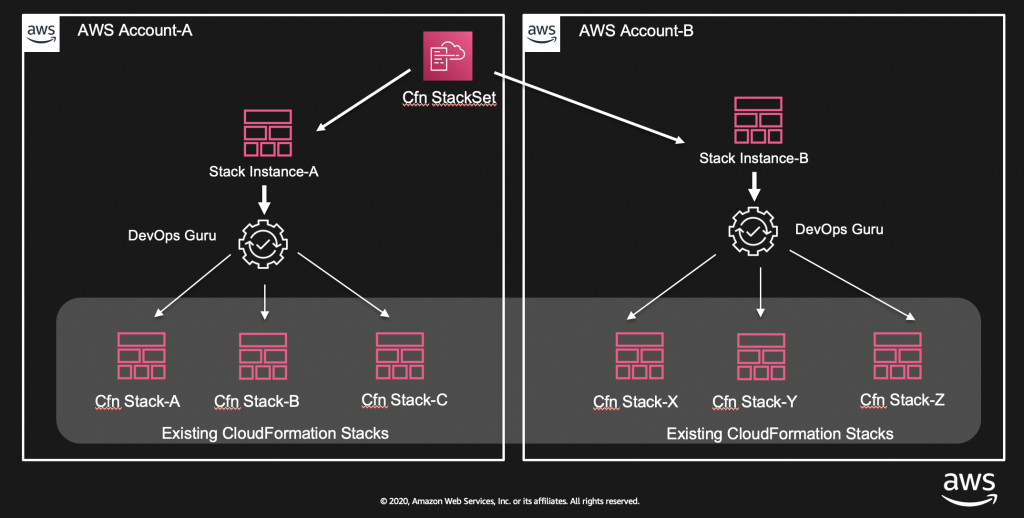

When **Amazon DevOps Guru** is enabled to monitor your resources within the account, it uses a combination of vended **Amazon CloudWatch** metrics, **AWS CloudTrail** logs, and specific patterns from its ML models to detect an anomaly. When the anomaly is detected, it generates an insight with the recommendations.

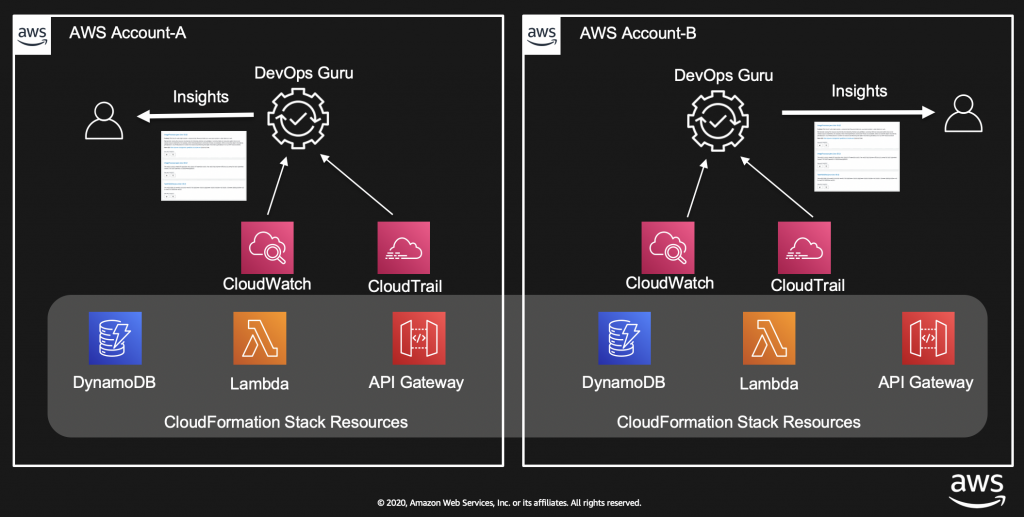

The prerequisites to complete the use case setup include:

* Using an **AWS Cloud9** environment or **AWS CLI** terminal
* Creating **IAM Roles**
* Creating the **AWSCloudFormationStackSetAdministrationRole** role
* Creating the **AWSCloudFormationStackSetExecutionRole** role

After this is accomplished, the various steps to ve taken up include:

* Running **AWS CloudFormation StackSets** to enable **DevOps Guru**
    * Configuring **Amazon SNS** topics for **DevOps Guru** to send notifications for operational insights
    * Enabling **DevOps Guru**: Below is a CloudFormation template that accomplished what we need:

In [ ]:
AWSTemplateFormatVersion: 2010-09-09
Description: Enable Amazon DevOps Guru

Parameters:
  CfnStackNames:
    Type: CommaDelimitedList
    Description: Comma separated names of the CloudFormation Stacks for DevOps Guru to analyze.
    Default: "*"

  SnsTopicName:
    Type: String
    Description: Name of SNS Topic

Resources:
  DevOpsGuruMonitoring:
    Type: AWS::DevOpsGuru::ResourceCollection
    Properties:
      ResourceCollectionFilter:
        CloudFormation:
          StackNames: !Ref CfnStackNames

  DevOpsGuruNotification:
    Type: AWS::DevOpsGuru::NotificationChannel
    Properties:
      Config:
        Sns:
          TopicArn: !Sub arn:aws:sns:${AWS::Region}:${AWS::AccountId}:${SnsTopicName}

* Reviewing **DevOps Guru** insights
* Cleaning up

All these steps, with the appropriate comands with example data and values, are demonstrated in the blog article mentioned in the references below.

## <font color='blue'> Benefits Of Using CloudFormation Stacks </font>

### <font color='blue'> Easily scale And Maintain Availability </font>

Amazon DevOps Guru saves you the time and effort involved in manually updating static rules and alarms so you can effectively monitor complex and evolving applications. Using CloudFormation StackSetrs to accomplish this makes things seamless and simple.

### <font color='blue'> Proactive Resource Management </font>

DevOps Guru can identify when your exhaustible resources such as memory, CPU, and disk space will exceed the provisioned capacity. It continuously ingests and analyzes your resources and applications that run on AWS, and helps you avoid an impending outage by creating a low noise notification in the dashboard.

As always, using CloudFormation improves the configurability and simplicity of the setup.

### <font color='blue'> Dynamically Discover New Resources And Metrics </font>


As your application evolves and new supported resources are added, DevOps Guru learns patterns for each new metric and alerts you with early warnings of operational issues. One no longer has to update or fix misconfigured alarms, as DevOps Guru ingests metrics from these resources and classifies them automatically.

Using CloudFormation StackSets helps implement this feature using repeatable and simple configurations.

## <font color='blue'> References </font>

1. AWS DevOps Blog: Easily configure Amazon DevOps Guru across multiple accounts and Regions using AWS CloudFormation StackSets - [https://aws.amazon.com/blogs/devops/configure-devops-guru-multiple-accounts-regions-using-cfn-stacksets/](https://aws.amazon.com/blogs/devops/configure-devops-guru-multiple-accounts-regions-using-cfn-stacksets/)
2. Amazon DevOps Guru: AWS - [https://aws.amazon.com/devops-guru/](https://aws.amazon.com/devops-guru/)
3. Image: DevOps Guru Multi-Account Deployment - [https://d2908q01vomqb2.cloudfront.net/7719a1c782a1ba91c031a682a0a2f8658209adbf/2020/12/08/pic1-1024x518.png](https://d2908q01vomqb2.cloudfront.net/7719a1c782a1ba91c031a682a0a2f8658209adbf/2020/12/08/pic1-1024x518.png)
4. Image: DevOps Guru - CloudFormation Resources - [https://d2908q01vomqb2.cloudfront.net/7719a1c782a1ba91c031a682a0a2f8658209adbf/2020/12/08/pic2-1024x517.png](https://d2908q01vomqb2.cloudfront.net/7719a1c782a1ba91c031a682a0a2f8658209adbf/2020/12/08/pic2-1024x517.png)

# <font color='blue'> Coinbase Fenrir: Using AWS CloudFormation To Scale Serverless Applications </font>

**Coinbase** is a Bitcoin Wallet that has quickly become the leader in bitcoin transactions. To respond to ever-increasing customer demand for bitcoin transactions, it has invested in **AWS CloudFormation** to codify its deployments. Security and Scalability are the most important of these tenets.

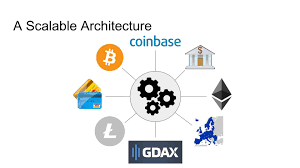

## <font color='blue'> Coinbase And AWS Services </font>

The company began designing the new **Coinbase Exchange** by using **AWS Identity and Access Management (IAM)**, which securely controls access to AWS services.

Coinbase created a streaming data insight pipeline in AWS, with real-time exchange analytics processed by an **Amazon Kinesis** managed big-data processing service.

Coinbase also integrates the insight pipeline with **AWS CloudTrail** log files, which are sent to **Amazon Simple Storage Service (Amazon S3)** buckets, then to the **AWS Lambda** compute service, and on to **Kinesis** containers based on **Docker** images. This gives Coinbase complete, transparent, and indexed audit logs across its entire IT environment.

Coinbase also uses **Amazon Virtual Private Cloud (Amazon VPC)** endpoints to optimize throughput to **Amazon S3**, and **Amazon WorkSpaces** to provision cloud-based desktops for global workers.

## <font color='blue'> Coinbase Fenrir: Building Infrastructure </font>

The Infrastructure Team at Coinbase has the goal of enabling any engineer in the company to quickly and securely deploy complex infrastructure. As their clouds evolved in complexity, they ran into the shortcomings of the existing tools, and experimented with a variety of ways to scale the effort.

Providing a secure and pleasant experience for thousands of developers building and deploying hundreds of serverless applications to dozens of AWS accounts is the goal. To that end, they developed and open sourced **Fenrir**, an **AWS SAM deployer**.

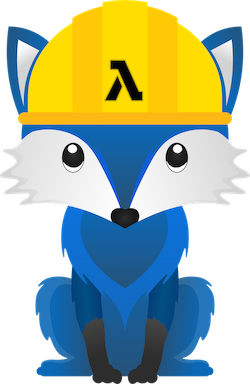

Serverless frameworks typically include a **CLI** that can create/update AWS resources and deploy code. For example, both serverless deploy and SAM deploy use **AWS Cloud Formation (CF)** to release code. These deploy commands are useful when getting started, and can easily be put into a **CI/CD pipeline** to accelerate application release.

A centralized deployer provides clear boundaries to developers working in the same AWS account and blocks deployment unless common practices are followed. This removes the cognitive overhead of a lot of details and allow engineers to focus on their application code.

## <font color='blue'> Fenrir Serverless Deployer: State Machine </font>

Fenrir’s state machine replicates these steps with explicit state transitions, retries, and error handling:

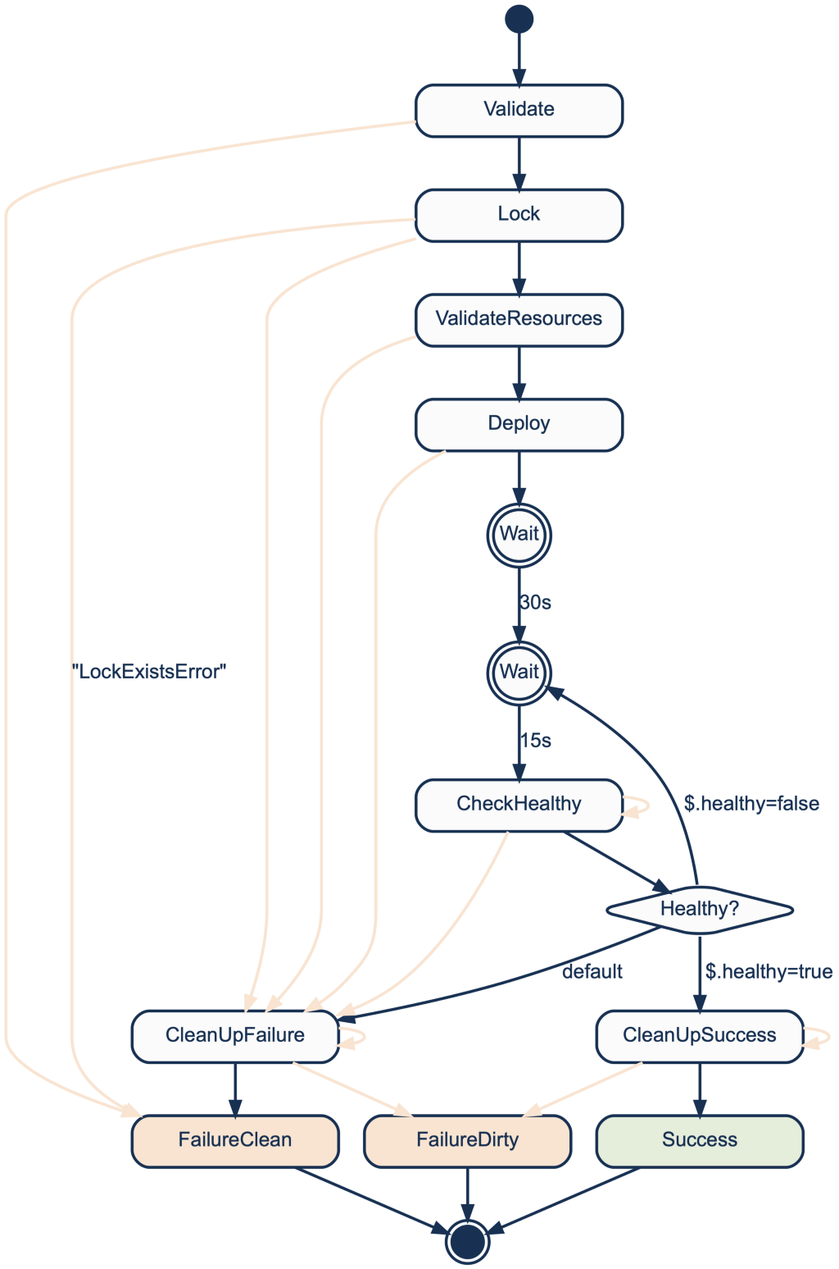

The input to this state machine is a SAM template with some additional data like **ProjectName**, **ConfigName** and the **AWS account** to deploy to. The Fenrir state machine then performs the following steps:

* **Validate**: fills in defaults then validates the template is correct and all referenced resources are allowed to be used.
* **Lock**: creates a lock to make sure that only one deploy per project can go out at a time.
* **CreateChangeSet and wait to Execute**: create a change-set for a CF stack. Waits for the change-set to be validated and become available.
* **ExecuteChangeSet and wait for Success**: waits for the execution to finish.

## <font color='blue'> Fenrir Serverless Deployer: Implementation </font>

Fenrir is implemented primarily using:

* **aws-sdk-go** to interact with **CloudFormation** and other AWS resources
* **step** as the framework to build, test and deploy **AWS Step Functions**
* **goformation** to encode/decode **CloudFormation** and **SAM** resources as golang structs, and validate them using JSON schema.

## <font color='blue'> Fenrir Serverless Deployer: Example CF Template </font>

Below is a sample SAM Template file that mimics what a Coinbase Fenrir SAM deployer would use with CloudFormation:

In [ ]:
ProjectName: “coinbase/deploy-test”
ConfigName: “development”
AWSTemplateFormatVersion: “2010–09–09”
Transform: AWS::Serverless-2016–10–31
Resources:
 helloAPI:
  Type: AWS::Serverless::Api
  Properties:
   StageName: dev
   EndpointConfiguration: REGIONAL
 hello:
  Type: AWS::Serverless::Function
  Properties:
   CodeUri: .
   Role: lambda-role
   Handler: hello.lambda
   Runtime: go1.x
   Events:
    hi:
     Type: Api
     Properties:
     RestApiId: !Ref helloAPI
     Path: /hello
     Method: GET

And the hello lambda function code:

In [ ]:
package main
import “github.com/aws/aws-lambda-go/lambda”
func main() {
 lambda.Start(func(_ interface{}) (interface{}, error) {
  return map[string]string{“body”: “Hello”}, nil
 })
}

## <font color='blue'> Coinbase Fenrir: Advantages And Disadvantages </font>

### <font color='blue'> Advantages </font>

Fenrir gives Coinbase developers cutting edge tools with clear boundaries on how to use them. This is a huge win, but there is still lots of room for improvement by supporting more SAM resources, events and properties.

### <font color='blue'> Disadvantages </font>

SAM/Fenrir can’t deploy static websites to **S3** behind **CloudFront**, as **CloudFormation** at that stage does not support uploading **S3** Objects. 

### <font color='blue'> The Future </font>

A future Fenrir feature is to provide a custom **CloudFormation** resource that can upload files to **S3** for static website hosting. This would make Fenrir a full-stack serverless deployer.

## <font color='blue'> References </font>

1. Coinbase Case Study: AWS Solutions - [https://aws.amazon.com/solutions/case-studies/coinbase/](https://aws.amazon.com/solutions/case-studies/coinbase/)
2. Introducing Fenrir: Coinbase Is Codifying Serverless applications - The Coinbase Blog - [https://blog.coinbase.com/introducing-fenrir-how-coinbase-is-scaling-serverless-applications-9ba6e3a74761](https://blog.coinbase.com/introducing-fenrir-how-coinbase-is-scaling-serverless-applications-9ba6e3a74761)
3. Image: Coinbase Fenrir State Machine - [https://benbronsteiny.files.wordpress.com/2018/11/349ac-1rgvzjto1ogbprakuvvlr1g.png?w=840](https://benbronsteiny.files.wordpress.com/2018/11/349ac-1rgvzjto1ogbprakuvvlr1g.png?w=840)
4. Image: Coinbase Fenrir Logo - [https://miro.medium.com/max/500/0*tCus30YE_VxA5oRG](https://miro.medium.com/max/500/0*tCus30YE_VxA5oRG)
5. Image: Coinbase Schematic - [https://res.infoq.com/presentations/coinbase-blockchain/en/slides/sl39.jpg](https://res.infoq.com/presentations/coinbase-blockchain/en/slides/sl39.jpg)

# <font color='blue'> Deloitte ConvergeHEALTH Miner™ on AWS </font>

Pharmaceutical and life sciences organizations often have limited accessibility to, or knowledge of clinical trial data sharing opportunities. Furthermore, they lack digital health record interoperability and ease of aggregating data. 

The **Deloitte ConvergeHEALTH Miner** is a real-world **Evidence Collaboration Platform** for life sciences organizations, which enables them to harness the full potential of their data and insights.

Built on **AWS**, **Miner** is designed to help accelerate real-world evidence generation and management across the research and development lifecycle. 

The integrated cloud-based analytics, knowledge management, and collaboration platform improves the client’s visibility into their data. This helps to enhance and accelerate analysis and insights that shorten development times and uncover new opportunities.

Deloitte offers automated platform deployment of the **ConvergeHEALTH Miner** product leveraging the **AWS CloudFormation service**. This can significantly reduce the deployment time. Their **Cohort Insight** and **Research Trust** modules extend support to **Amazon Redshift** - a fast, fully managed data warehouse service. 

Additionally, **ConvergeHEALTH Miner** has integrated a data lake catalog and management accelerator built on top of **AWS Glue**. The product supports an advanced analytics library built on **AWS Lambda** and **Amazon Machine Learning** (**Amazon ML**).

## <font color='blue'> The Real-World Evidence Collaboration Platform </font>

Data Lakes are considered to be a source of truth for all subsequent stages of processing and analysis.

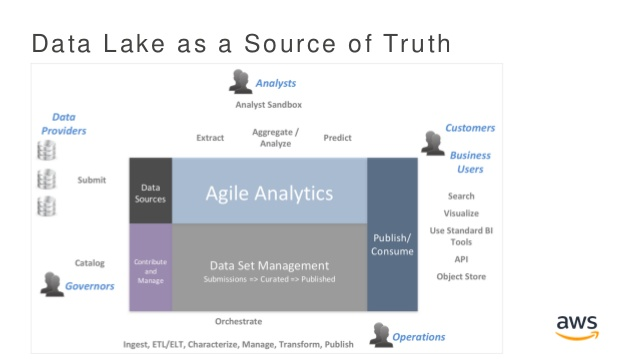

Data Acquisition:

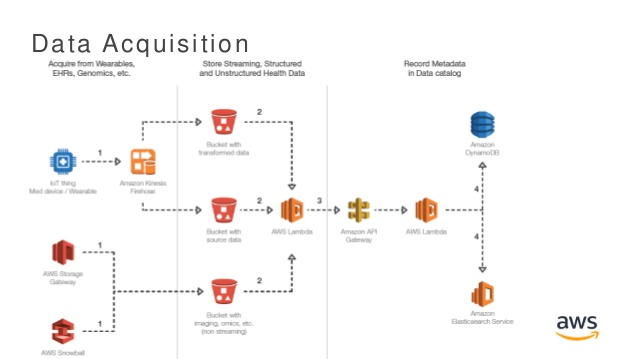

Data Processing:

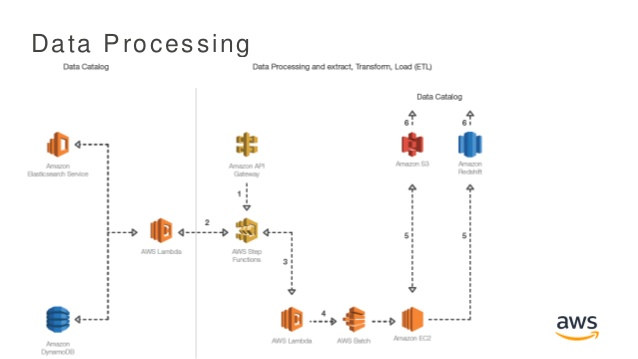

Data Analysis:

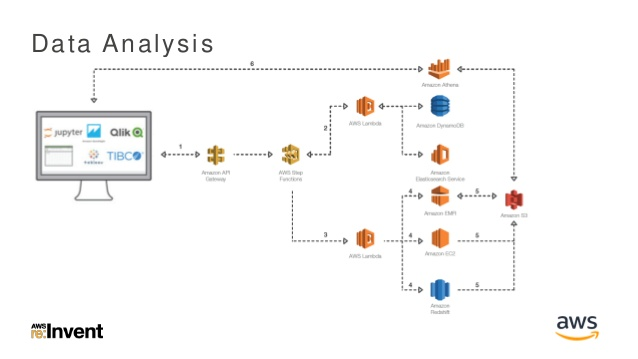

Real-World Evidence Platform - Conceptual Architecture:

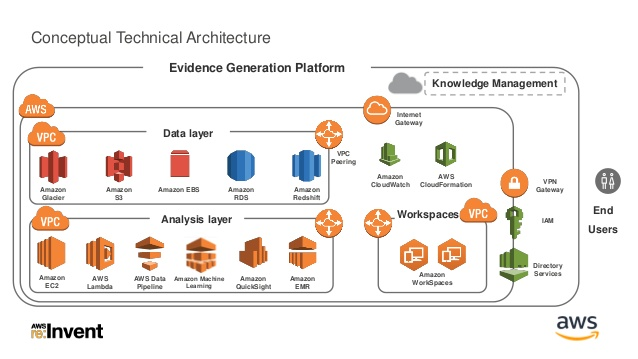

## <font color='blue'> The Role Of CloudFormation </font>



## <font color='blue'> References </font>

1. Deloitte ConvergeHEALTH Miner: AWS Solution Brief - [https://d1.awsstatic.com/Solution%20Space%20(CRS)/Solution-Space-Deloitte-ConvergeHEALTH-Miner-on-AWS-solution-brief.pdf](https://d1.awsstatic.com/Solution%20Space%20(CRS)/Solution-Space-Deloitte-ConvergeHEALTH-Miner-on-AWS-solution-brief.pdf)
2. Real-World Evidence Platform To Enable Therapeutic Innovation: SlideShare.net - [https://www.slideshare.net/AmazonWebServices/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation](https://www.slideshare.net/AmazonWebServices/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation)
3. Image: Evidence Generation Platform - Conceptual Technical Architecture - [https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-15-638.jpg?cb=1512149958](https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-15-638.jpg?cb=1512149958)
4. Image: Evidence Generation Platform - Technical Architecture - [https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-16-638.jpg?cb=1512149958](https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-16-638.jpg?cb=1512149958)
5. Image: Evidence Generation Platform - Data Lake (Source Of truth) - [https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-4-638.jpg?cb=1512149958](https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-4-638.jpg?cb=1512149958)
6. Image: Evidence Generation Platform - Data Acquisition - [https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-5-638.jpg?cb=1512149958](https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-5-638.jpg?cb=1512149958)
7. Image: Evidence Generation Platform - Data Processing - [https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-6-638.jpg?cb=1512149958](https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-6-638.jpg?cb=1512149958)
8. Image: Evidence Generation Platform - Data Analysis - [https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-7-638.jpg?cb=1512149958](https://image.slidesharecdn.com/lfs302-real-world-evidence-pla-d49e7bc1-1d8e-42d1-b590-ae6f811413c5-1463297327-171129195401/95/lfs302realworld-evidence-platform-to-enable-therapeutic-innovation-7-638.jpg?cb=1512149958)